In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
Raw_Data = pd.read_csv('healthcare-dataset-stroke-data.csv')
Raw_Data = Raw_Data.drop(['id'], axis=1)
Raw_Data = Raw_Data[Raw_Data['gender'] != 'Other']
Raw_Data.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
Raw_Data['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [4]:
Raw_Data['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [5]:
Raw_Data['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [6]:
Raw_Data['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [7]:
Raw_Data['age'].describe()

count    5109.000000
mean       43.229986
std        22.613575
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [8]:
Raw_Data['avg_glucose_level'].describe()
Raw_Data['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [9]:
Raw_Data['bmi'].describe()


count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

In [10]:
Raw_Data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
Raw_Data.fillna(Raw_Data['bmi'].mean(), inplace=True)

In [12]:
Raw_Data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
X1 = Raw_Data[['age']]
X2 = Raw_Data[['bmi']]
X3 = Raw_Data[['avg_glucose_level']]

X8 = Raw_Data[['hypertension']]
X9 = Raw_Data[['heart_disease']]

X4 = Raw_Data[['gender']]
X5 = Raw_Data[['ever_married']]
X6 = Raw_Data[['work_type']]
X7 = Raw_Data[['smoking_status']]



X10 = Raw_Data[['Residence_type']]




y = Raw_Data['stroke']

In [14]:
X4_dummy = pd.get_dummies(X4)
X5_dummy = pd.get_dummies(X5)
X6_dummy = pd.get_dummies(X6)
X7_dummy = pd.get_dummies(X7)

X8_dummy = pd.get_dummies(X8)
X9_dummy = pd.get_dummies(X9)
X10_dummy = pd.get_dummies(X10)

In [15]:
Prepro_Data = pd.concat([X1, X2, X3, X8, X9, X4, X5, X6, X7, X10], axis=1)
Prepro_Data1 = pd.concat([X1, X2, X3, X8, X9, X4, X5, X6, X7, X10, y], axis=1)

Prepro_Data2 = pd.concat([X1, X2, X3, X8, X9, X4_dummy, X5_dummy, X6_dummy, X7_dummy, X10_dummy], axis=1)

Prepro_Data

,age,bmi,avg_glucose_level,hypertension,heart_disease,gender,ever_married,work_type,smoking_status,Residence_type
0,67.0,36.60000,228.69,0,1,Male,Yes,Private,formerly smoked,Urban
1,61.0,28.89456,202.21,0,0,Female,Yes,Self-employed,never smoked,Rural
2,80.0,32.50000,105.92,0,1,Male,Yes,Private,never smoked,Rural
3,49.0,34.40000,171.23,0,0,Female,Yes,Private,smokes,Urban
4,79.0,24.00000,174.12,1,0,Female,Yes,Self-employed,never smoked,Rural
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,28.89456,83.75,1,0,Female,Yes,Private,never smoked,Urban
5106,81.0,40.00000,125.20,0,0,Female,Yes,Self-employed,never smoked,Urban
5107,35.0,30.60000,82.99,0,0,Female,Yes,Self-employed,never smoked,Rural
5108,51.0,25.60000,166.29,0,0,Male,Yes,Private,formerly smoked,Rural


In [16]:
def classify_birth_year_group(age):
  birth_year = 2024 - age
  if birth_year >= 2013:
      return 'Gen_Alpha'
  elif 1995 <= birth_year <= 2012:
      return 'Gen_Z'
  elif 1980 <= birth_year <= 1994:
      return 'Gen_Y'
  elif 1965 <= birth_year <= 1979:
      return 'Gen_X'
  else:
      return 'Baby_Boomer'

Prepro_Data['Generation'] = Prepro_Data['age'].apply(classify_birth_year_group)
# Prepro_Data2['Generation'] = Prepro_Data2['age'].apply(classify_birth_year_group) 


X11 = Prepro_Data[['Generation']]

In [17]:
def classify_glucose_level(glucose):
    if glucose < 70:
        return '<70'
    elif 70 <= glucose < 90:
        return '70-90'
    elif 90 <= glucose < 110:
        return '90-110'
    elif 110 <= glucose < 130:
        return '110-130'
    elif 130 <= glucose < 150:
        return '130-150'
    elif 150 <= glucose < 170:
        return '150-170'
    elif 170 <= glucose < 190:
        return '170-190'
    elif 190 <= glucose < 210:
        return '190-210'
    elif 210 <= glucose < 230:
        return '210-230'
    else:
        return '>230'

# Apply the function to the 'avg_glucose_level' column in Prepro_Data
Prepro_Data['glucose_binned'] = Prepro_Data['avg_glucose_level'].apply(classify_glucose_level)
# Prepro_Data2['glucose_binned'] = Prepro_Data2['avg_glucose_level'].apply(classify_glucose_level)

# Display the binned glucose levels
X12 = Prepro_Data['glucose_binned']



In [18]:
def classify_bmi_group(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:  
        return 'Healthy Weight'
    elif 25.0 <= bmi <= 29.9:  
        return 'Overweight'
    else:
        return 'Obesity'


Prepro_Data['bmi_group'] = Prepro_Data['bmi'].apply(classify_bmi_group)
# Prepro_Data2['bmi_group'] = Prepro_Data2['bmi'].apply(classify_bmi_group)
X13 = Prepro_Data['bmi_group']


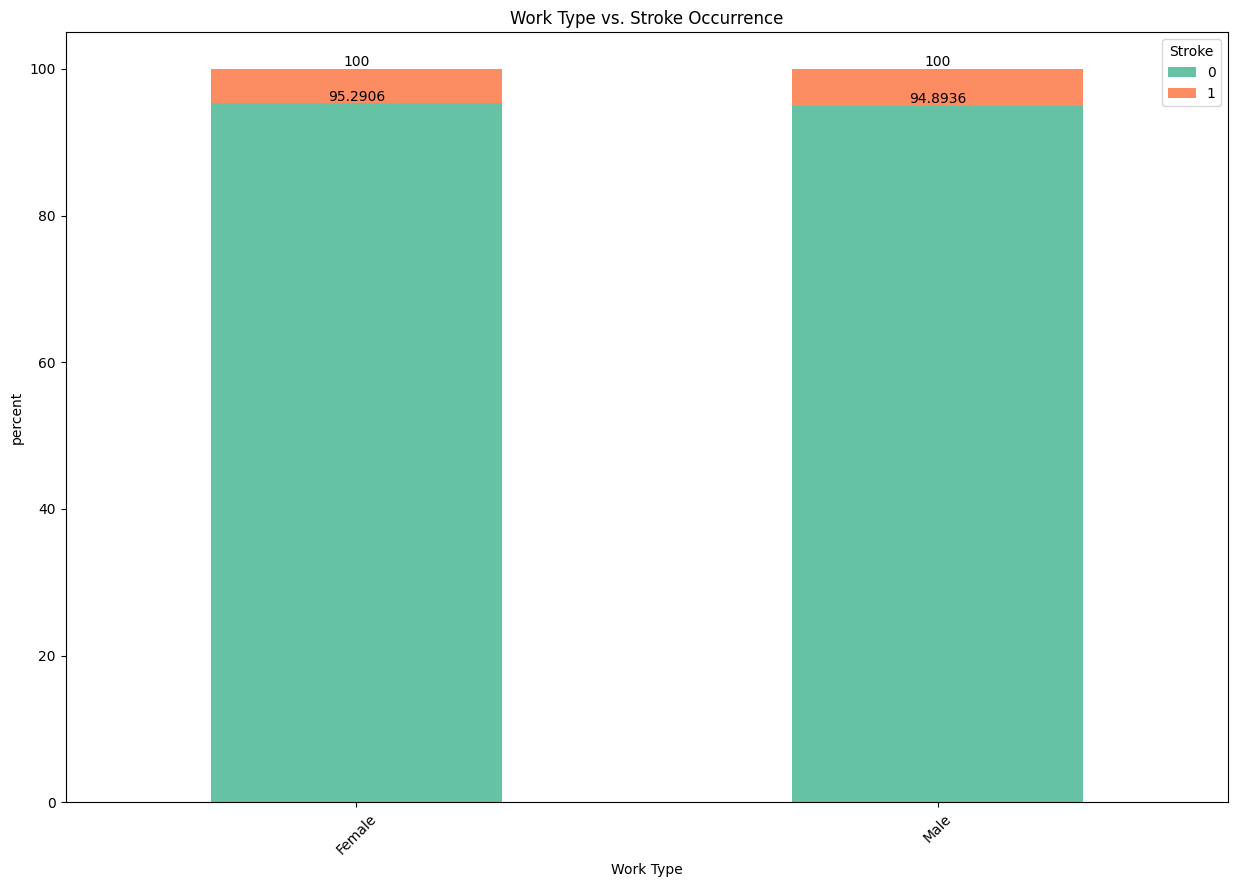

In [19]:
gender_Stroke = pd.concat([X4, y], axis=1)


fig, ax = plt.subplots(figsize=(15, 10))

gender_stroke_counts = gender_Stroke.groupby(['gender', 'stroke']).size().unstack()
gender_Stroke_totals = gender_stroke_counts.sum(axis=1)
gender_stroke_percent = gender_stroke_counts.div(gender_Stroke_totals, axis=0) * 100
ax = gender_stroke_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

for container in ax.containers:
    ax.bar_label(container)

plt.title('Work Type vs. Stroke Occurrence')
plt.xlabel('Work Type')
plt.ylabel('percent')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

In [20]:
# print(work_type_Stroke.columns)
# print(work_type_Stroke.isnull().sum())


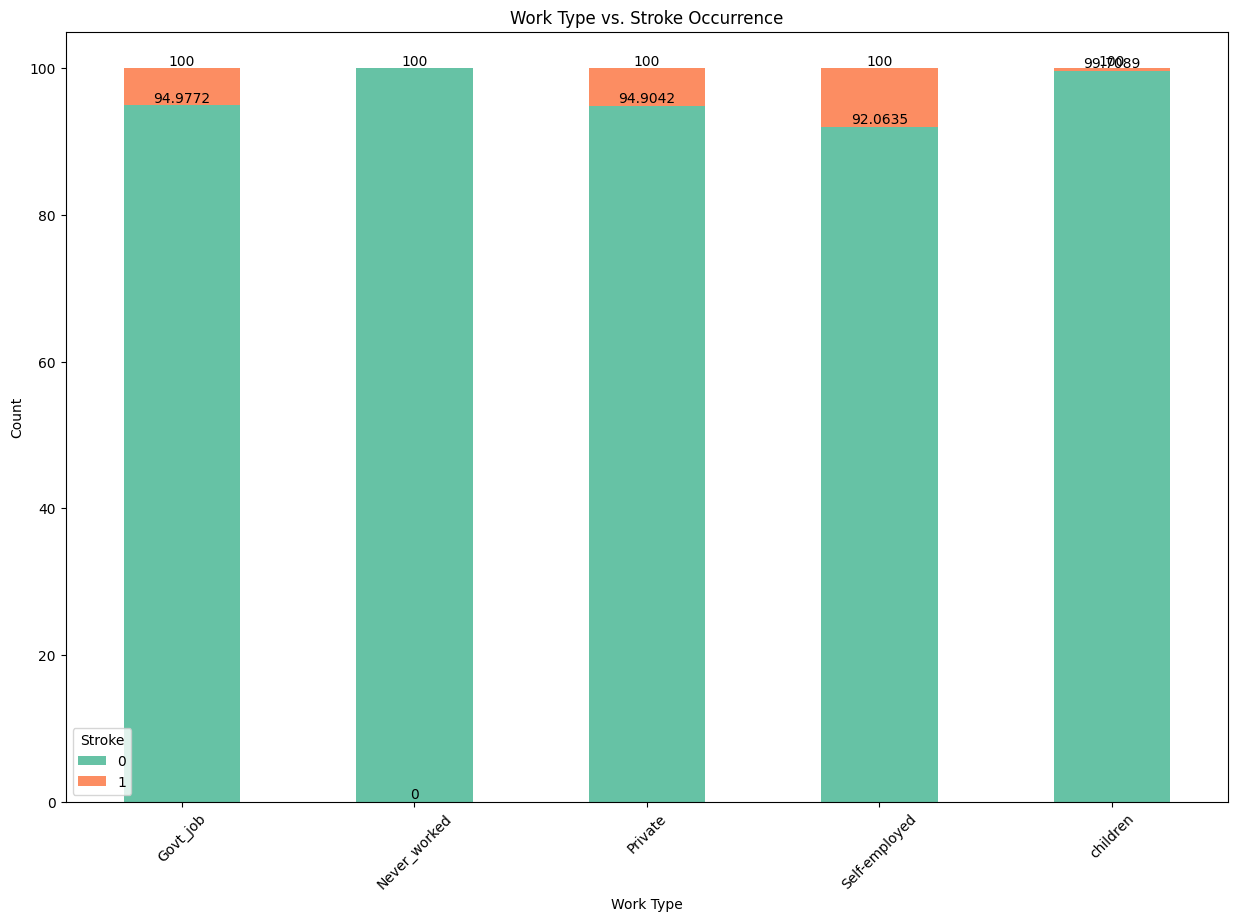

In [21]:
work_type_Stroke = pd.concat([X6, y], axis=1)


fig, ax = plt.subplots(figsize=(15, 10))

work_type_Stroke_counts = work_type_Stroke.groupby(['work_type', 'stroke']).size().unstack()
work_type_Stroke_totals = work_type_Stroke_counts.sum(axis=1)
work_type_stroke_percent = work_type_Stroke_counts.div(work_type_Stroke_totals, axis=0) * 100
ax = work_type_stroke_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=work_type_Stroke, x='work_type', hue='stroke', palette='Set2')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Work Type vs. Stroke Occurrence')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()


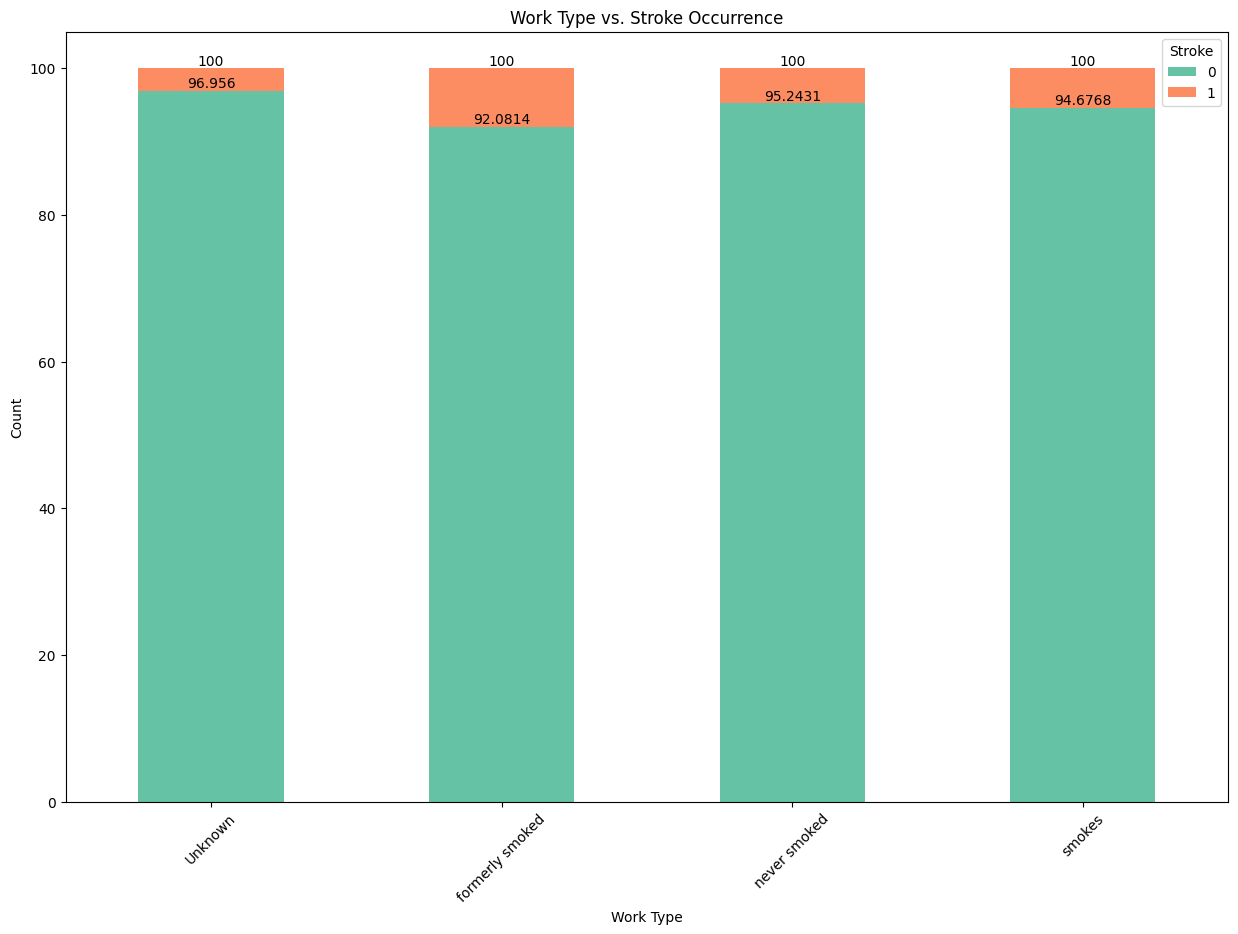

In [22]:
smoke_Stroke = pd.concat([X7, y], axis=1)

fig, ax = plt.subplots(figsize=(15, 10))

smoke_Stroke_counts = smoke_Stroke.groupby(['smoking_status', 'stroke']).size().unstack()
smoke_Stroke_totals = smoke_Stroke_counts.sum(axis=1)
smoke_Stroke_percent = smoke_Stroke_counts.div(smoke_Stroke_totals, axis=0) * 100
ax = smoke_Stroke_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=gender_Stroke, x='smoking_status', hue='stroke', palette='Set2')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Work Type vs. Stroke Occurrence')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

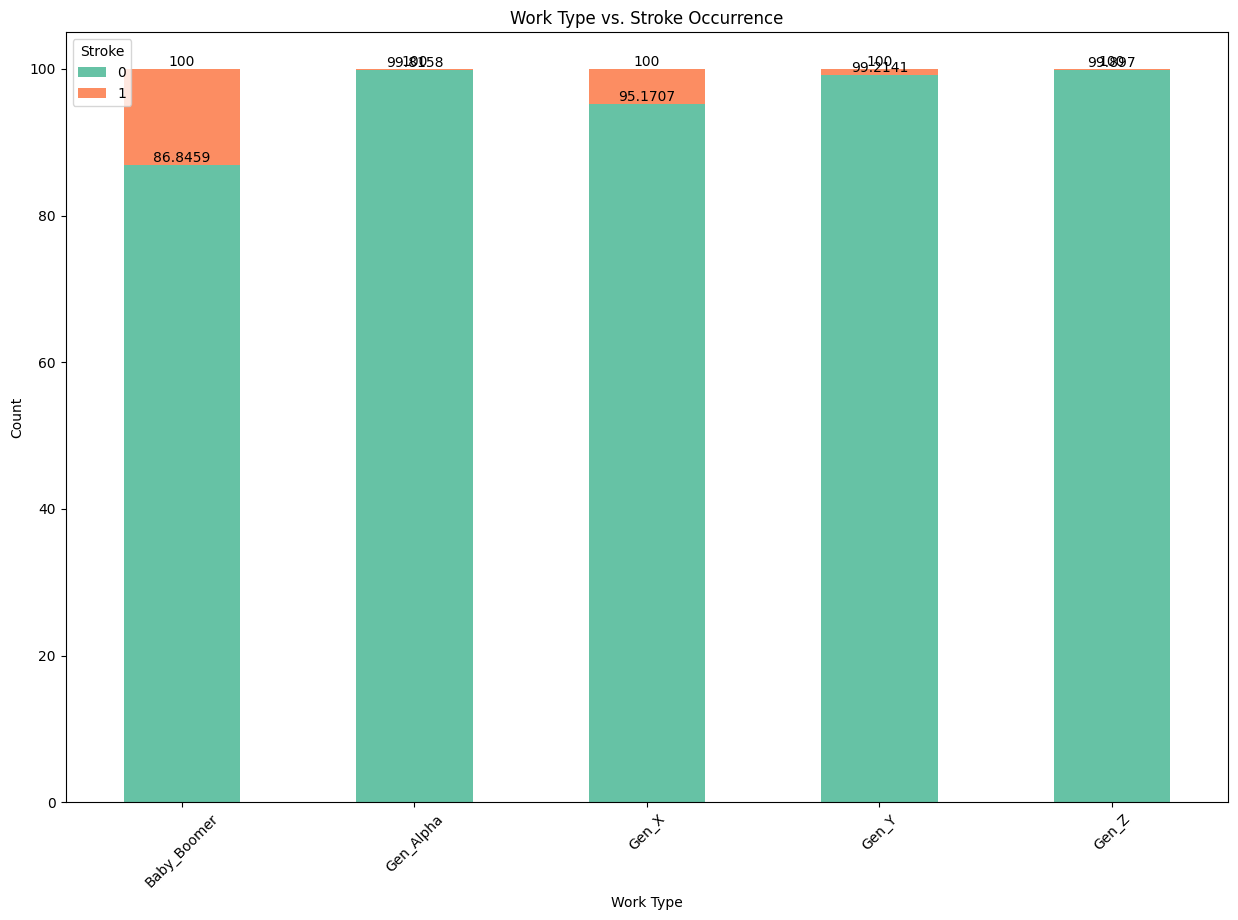

In [23]:
gen_Stroke = pd.concat([X11, y], axis=1)

fig, ax = plt.subplots(figsize=(15, 10))

gen_Stroke_counts = gen_Stroke.groupby(['Generation', 'stroke']).size().unstack()
gen_Stroke_totals = gen_Stroke_counts.sum(axis=1)
gen_Stroke_percent = gen_Stroke_counts.div(gen_Stroke_totals, axis=0) * 100

ax = gen_Stroke_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=gen_Stroke, x='Generation', hue='stroke', palette='Set2')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Work Type vs. Stroke Occurrence')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

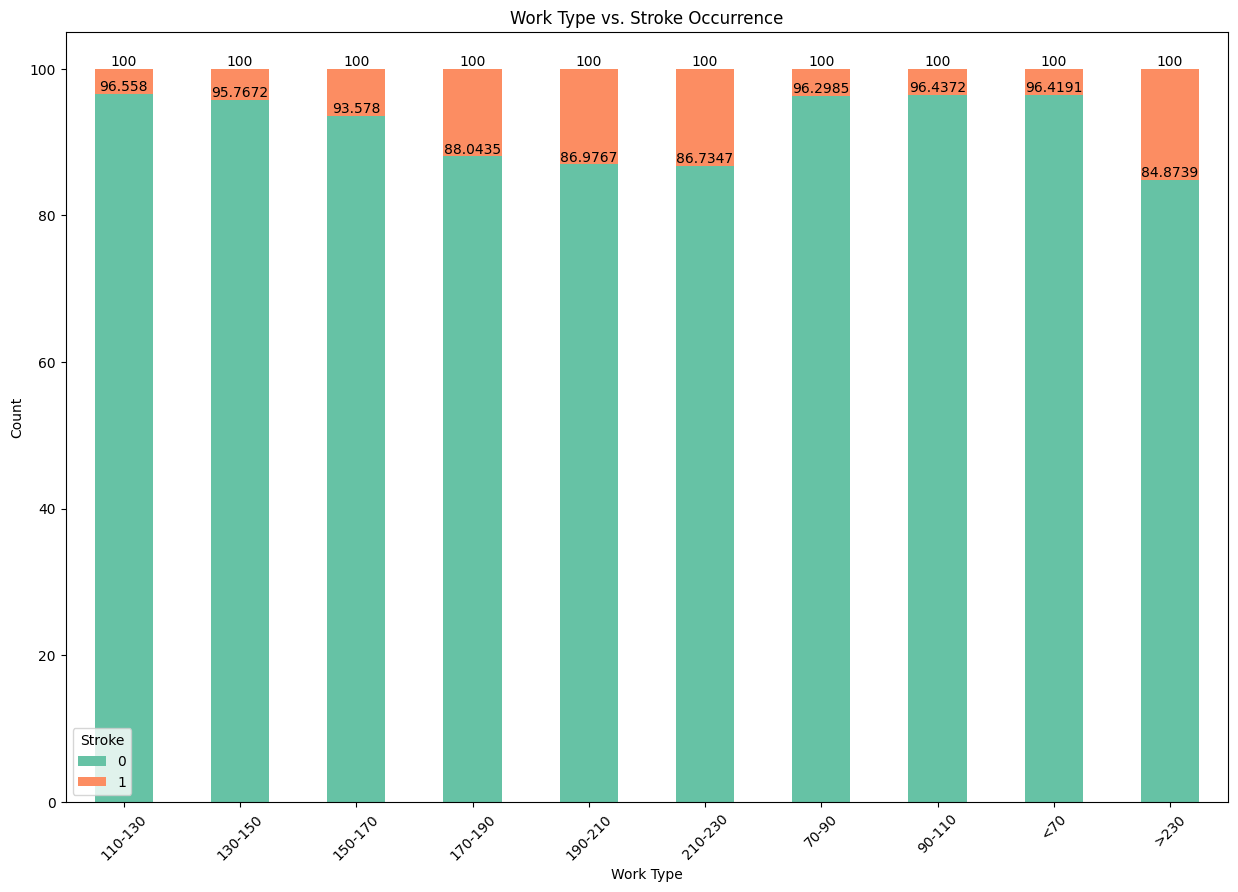

In [24]:
glu_Stroke = pd.concat([X12, y], axis=1)  

fig, ax = plt.subplots(figsize=(15, 10))

glu_Stroke_counts = glu_Stroke.groupby(['glucose_binned', 'stroke']).size().unstack()
glu_Stroke_totals = glu_Stroke_counts.sum(axis=1)
glu_Stroke_percent = glu_Stroke_counts.div(glu_Stroke_totals, axis=0) * 100

ax = glu_Stroke_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

for container in ax.containers:
    ax.bar_label(container)

plt.title('Work Type vs. Stroke Occurrence')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

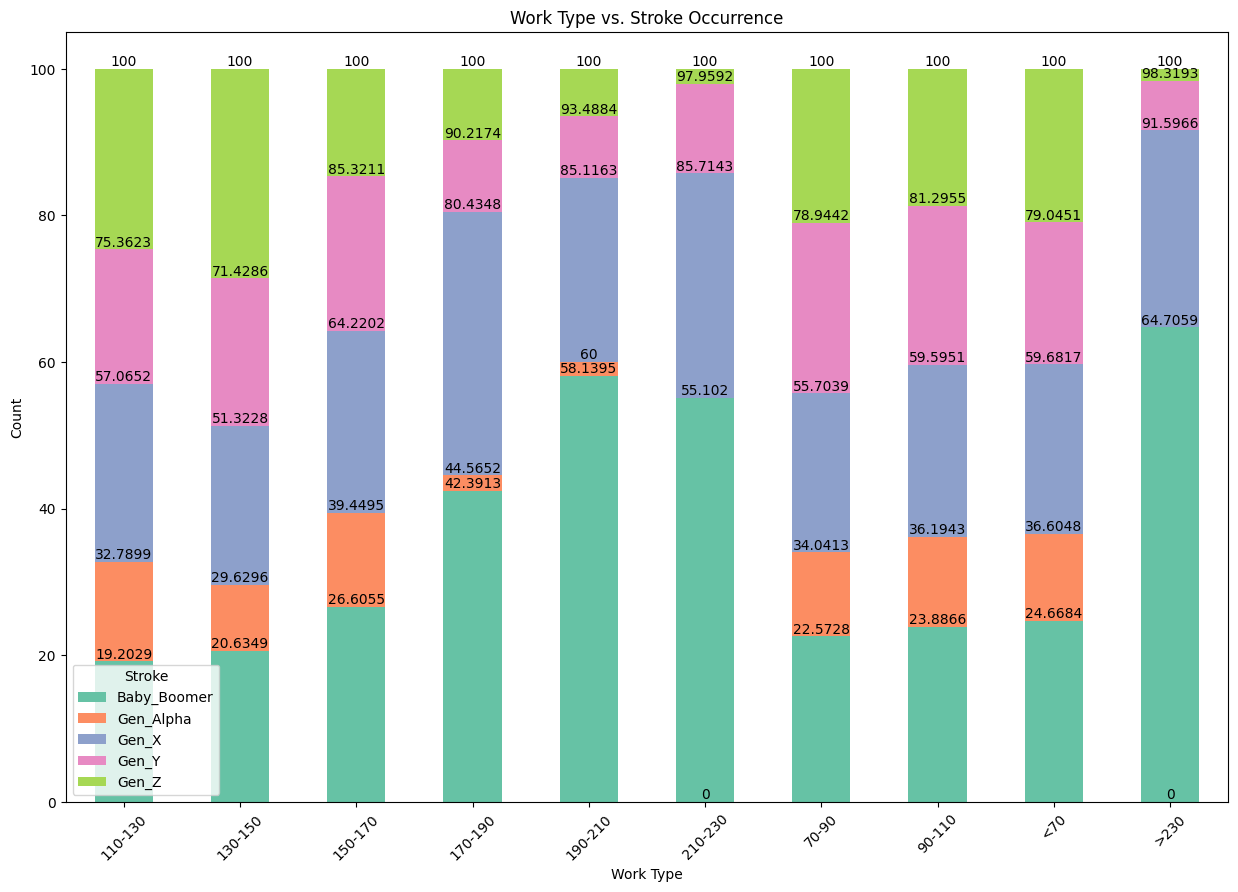

In [25]:
gen_glu = pd.concat([X11, X12], axis=1)  # Use X2.mean() to calculate the mean

fig, ax = plt.subplots(figsize=(15, 10))

gen_glu_counts = gen_glu.groupby(['glucose_binned', 'Generation']).size().unstack()
gen_glu_totals = gen_glu_counts.sum(axis=1)
gen_glu_percent = gen_glu_counts.div(gen_glu_totals, axis=0) * 100

ax = gen_glu_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=gen_glu, x='Generation', hue='glucose_binned', palette='Set2')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Work Type vs. Stroke Occurrence')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

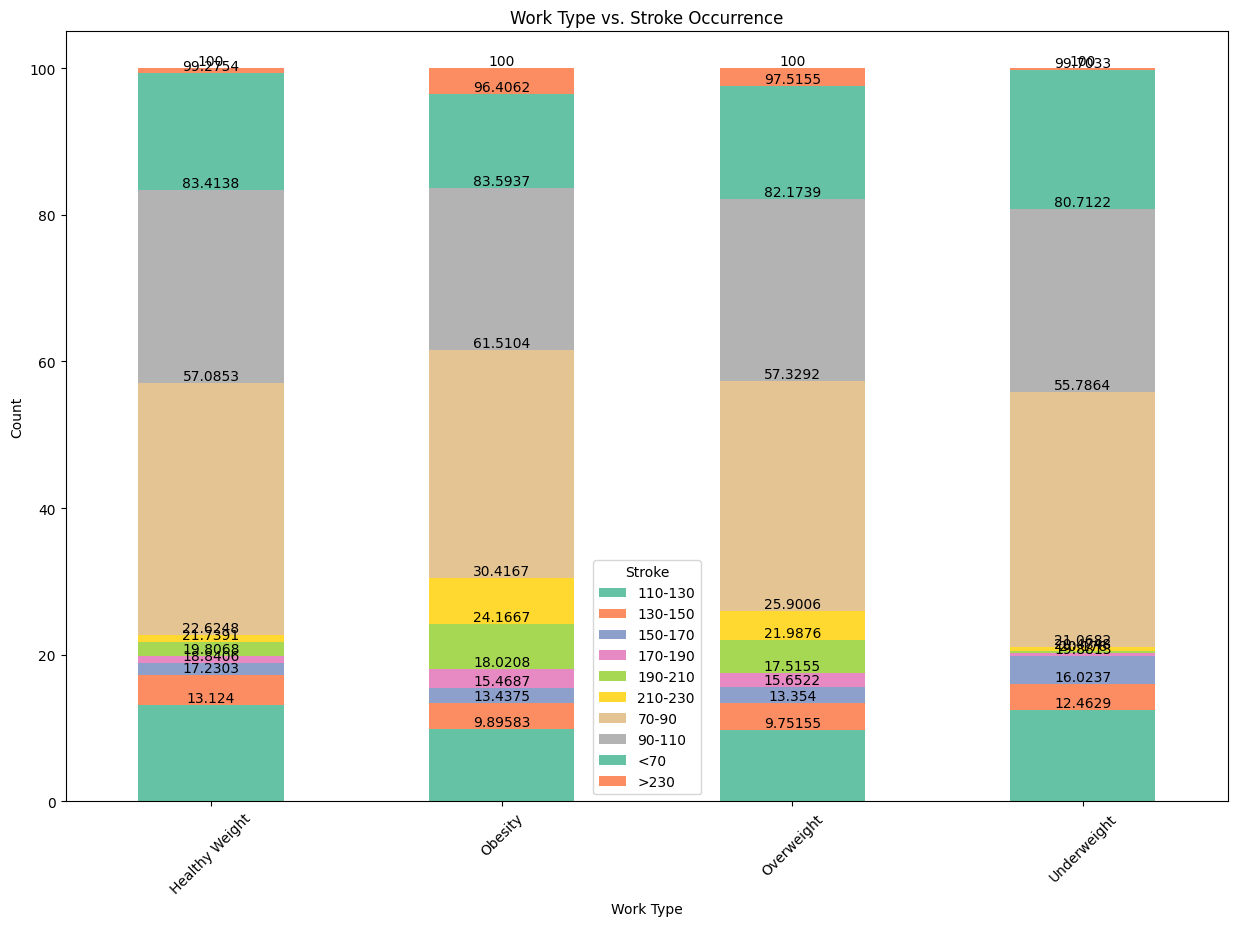

In [26]:
bmi_cat_glu = pd.concat([X12, X13], axis=1)  

fig, ax = plt.subplots(figsize=(15, 10))

bmi_cat_glu_counts = bmi_cat_glu.groupby(['bmi_group', 'glucose_binned']).size().unstack()
bmi_cat_glu_totals = bmi_cat_glu_counts.sum(axis=1)
bmi_cat_glu_percent = bmi_cat_glu_counts.div(bmi_cat_glu_totals, axis=0) * 100

ax = bmi_cat_glu_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=bmi_cat_glu, x='bmi_group', hue='glucose_binned', palette='Set1')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Work Type vs. Stroke Occurrence')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

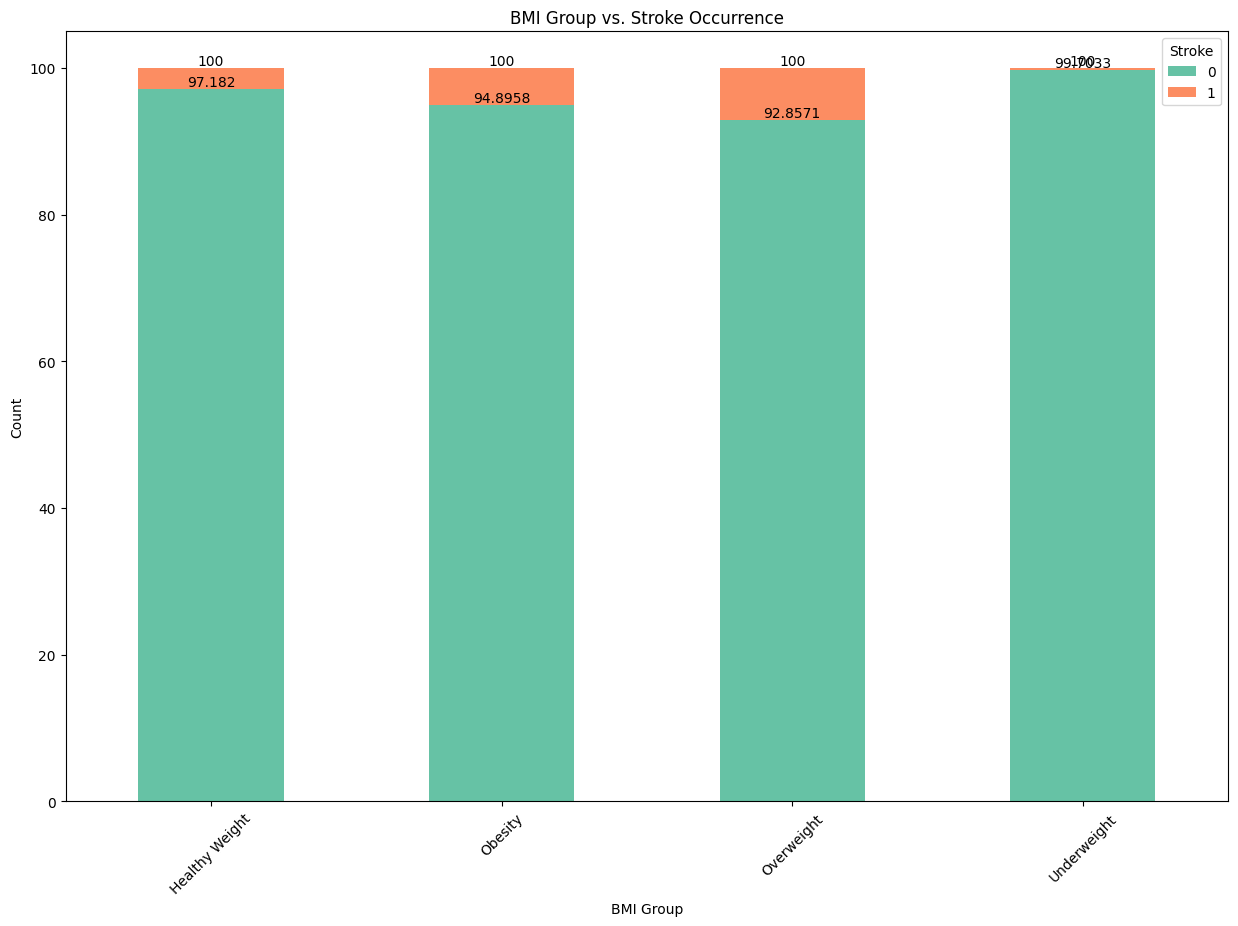

In [27]:
bmi_group_Ob = Prepro_Data[Prepro_Data['bmi_group'] == 'Obesity']
bmi_gr_Ob_Stroke = pd.concat([bmi_group_Ob, y], axis=1)

bmi_gr_Stroke = pd.concat([X13, y], axis=1)

fig, ax = plt.subplots(figsize=(15, 10))

bmi_gr_Stroke_counts = bmi_gr_Stroke.groupby(['bmi_group', 'stroke']).size().unstack()
bmi_gr_Stroke_totals = bmi_gr_Stroke_counts.sum(axis=1)
bmi_gr_Stroke_percent = bmi_gr_Stroke_counts.div(bmi_gr_Stroke_totals, axis=0) * 100

ax = bmi_gr_Stroke_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=bmi_gr_Stroke, x='bmi_group', hue='stroke', palette='Set1')


for container in ax.containers:
    ax.bar_label(container)


plt.title('BMI Group vs. Stroke Occurrence')
plt.xlabel('BMI Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stroke')



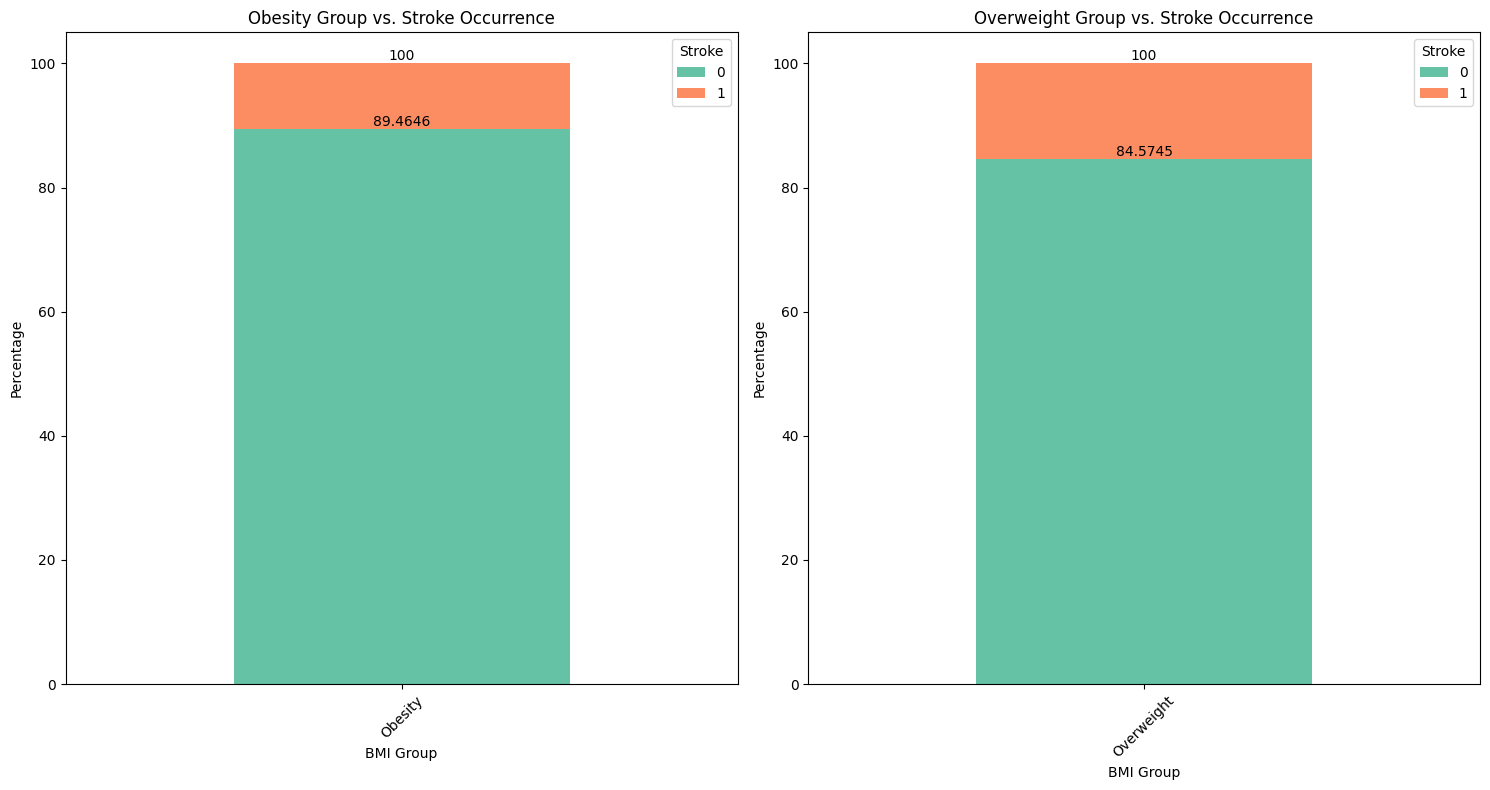

In [28]:

bmi_group_Ob_baby = Prepro_Data[(Prepro_Data['bmi_group'] == 'Obesity') & (Prepro_Data['Generation'] == 'Baby_Boomer')]
bmi_group_Ov_baby = Prepro_Data[(Prepro_Data['bmi_group'] == 'Overweight') & (Prepro_Data['Generation'] == 'Baby_Boomer')]


bmi_group_Ob_Stroke_baby = pd.concat([bmi_group_Ob_baby, y], axis=1)
bmi_group_Ov_Stroke_baby = pd.concat([bmi_group_Ov_baby, y], axis=1)


fig, ax = plt.subplots(1, 2, figsize=(15, 8))

bmi_group_Ob_Stroke_baby_counts = bmi_group_Ob_Stroke_baby.groupby(['bmi_group', 'stroke']).size().unstack()
bmi_group_Ob_Stroke_baby_totals = bmi_group_Ob_Stroke_baby_counts.sum(axis=1)
bmi_group_Ob_Stroke_baby_percent = bmi_group_Ob_Stroke_baby_counts.div(bmi_group_Ob_Stroke_baby_totals, axis=0) * 100

bmi_group_Ob_Stroke_baby_percent.plot(kind='bar', stacked=True, ax=ax[0], color=sns.color_palette('Set2'))

for container in ax[0].containers:
    ax[0].bar_label(container)

ax[0].set_title('Obesity Group vs. Stroke Occurrence')
ax[0].set_xlabel('BMI Group')
ax[0].set_ylabel('Percentage')
ax[0].legend(title='Stroke')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


bmi_group_Ov_Stroke_baby_counts = bmi_group_Ov_Stroke_baby.groupby(['bmi_group', 'stroke']).size().unstack()
bmi_group_Ov_Stroke_baby_totals = bmi_group_Ov_Stroke_baby_counts.sum(axis=1)
bmi_group_Ov_Stroke_baby_percent = bmi_group_Ov_Stroke_baby_counts.div(bmi_group_Ov_Stroke_baby_totals, axis=0) * 100

bmi_group_Ov_Stroke_baby_percent.plot(kind='bar', stacked=True, ax=ax[1], color=sns.color_palette('Set2'))

for container in ax[1].containers:
    ax[1].bar_label(container)

ax[1].set_title('Overweight Group vs. Stroke Occurrence')
ax[1].set_xlabel('BMI Group')
ax[1].set_ylabel('Percentage')
ax[1].legend(title='Stroke')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()



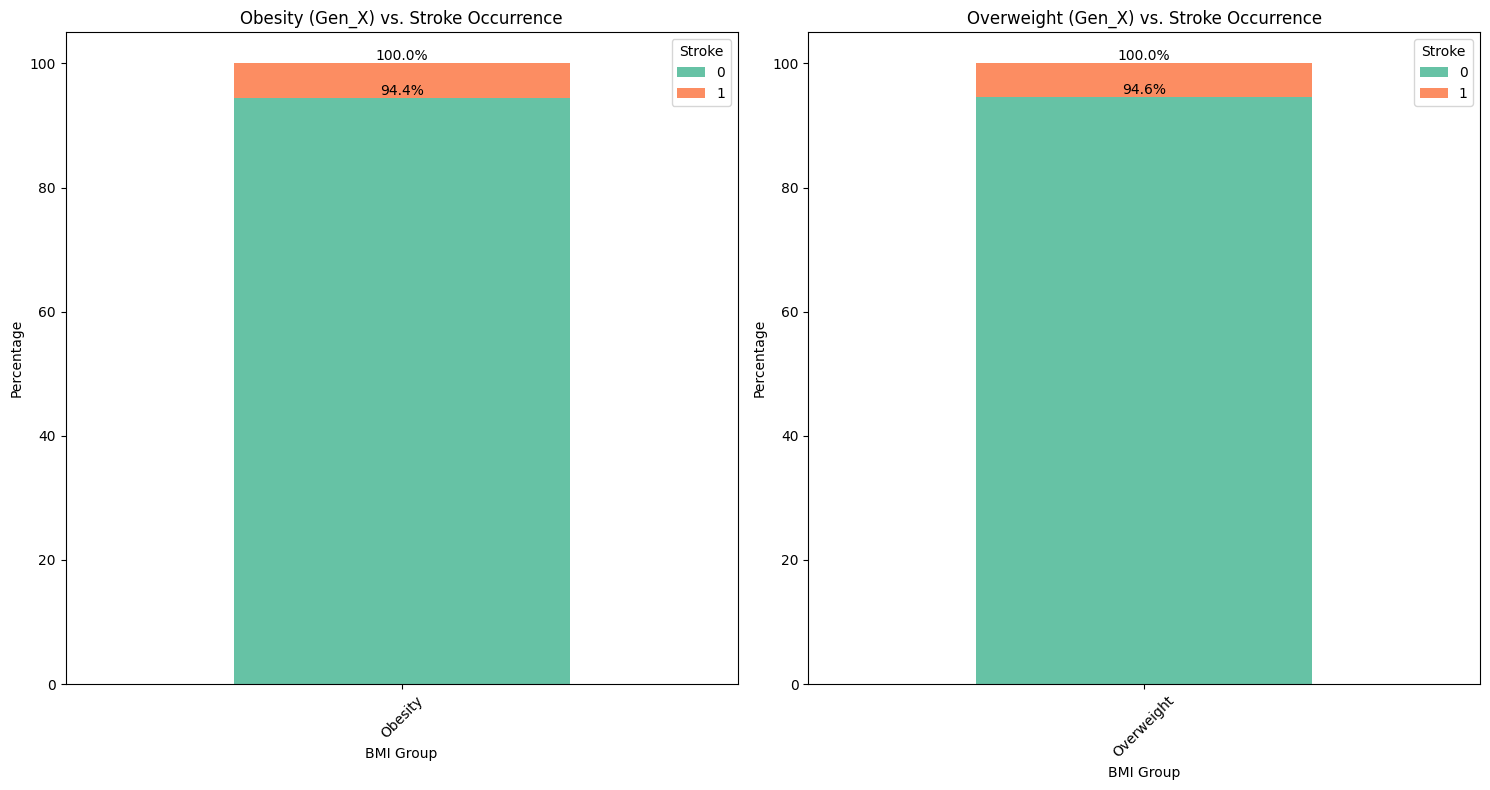

In [29]:

bmi_group_Ob_GenX = Prepro_Data[(Prepro_Data['bmi_group'] == 'Obesity') & (Prepro_Data['Generation'] == 'Gen_X')]
bmi_group_Ov_GenX = Prepro_Data[(Prepro_Data['bmi_group'] == 'Overweight') & (Prepro_Data['Generation'] == 'Gen_X')]


bmi_group_Ob_Stroke_GenX = pd.concat([bmi_group_Ob_GenX, y], axis=1)
bmi_group_Ov_Stroke_GenX = pd.concat([bmi_group_Ov_GenX, y], axis=1)


fig, ax = plt.subplots(1, 2, figsize=(15, 8))


bmi_group_Ob_Stroke_GenX_counts = bmi_group_Ob_Stroke_GenX.groupby(['bmi_group', 'stroke']).size().unstack()
bmi_group_Ob_Stroke_GenX_totals = bmi_group_Ob_Stroke_GenX_counts.sum(axis=1)
bmi_group_Ob_Stroke_GenX_percent = bmi_group_Ob_Stroke_GenX_counts.div(bmi_group_Ob_Stroke_GenX_totals, axis=0) * 100

bmi_group_Ob_Stroke_GenX_percent.plot(kind='bar', stacked=True, ax=ax[0], color=sns.color_palette('Set2'))

for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.1f%%')

ax[0].set_title('Obesity (Gen_X) vs. Stroke Occurrence')
ax[0].set_xlabel('BMI Group')
ax[0].set_ylabel('Percentage')
ax[0].legend(title='Stroke')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


bmi_group_Ov_Stroke_GenX_counts = bmi_group_Ov_Stroke_GenX.groupby(['bmi_group', 'stroke']).size().unstack()
bmi_group_Ov_Stroke_GenX_totals = bmi_group_Ov_Stroke_GenX_counts.sum(axis=1)
bmi_group_Ov_Stroke_GenX_percent = bmi_group_Ov_Stroke_GenX_counts.div(bmi_group_Ov_Stroke_GenX_totals, axis=0) * 100

bmi_group_Ov_Stroke_GenX_percent.plot(kind='bar', stacked=True, ax=ax[1], color=sns.color_palette('Set2'))

for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.1f%%')

ax[1].set_title('Overweight (Gen_X) vs. Stroke Occurrence')
ax[1].set_xlabel('BMI Group')
ax[1].set_ylabel('Percentage')
ax[1].legend(title='Stroke')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


plt.tight_layout()
plt.show()


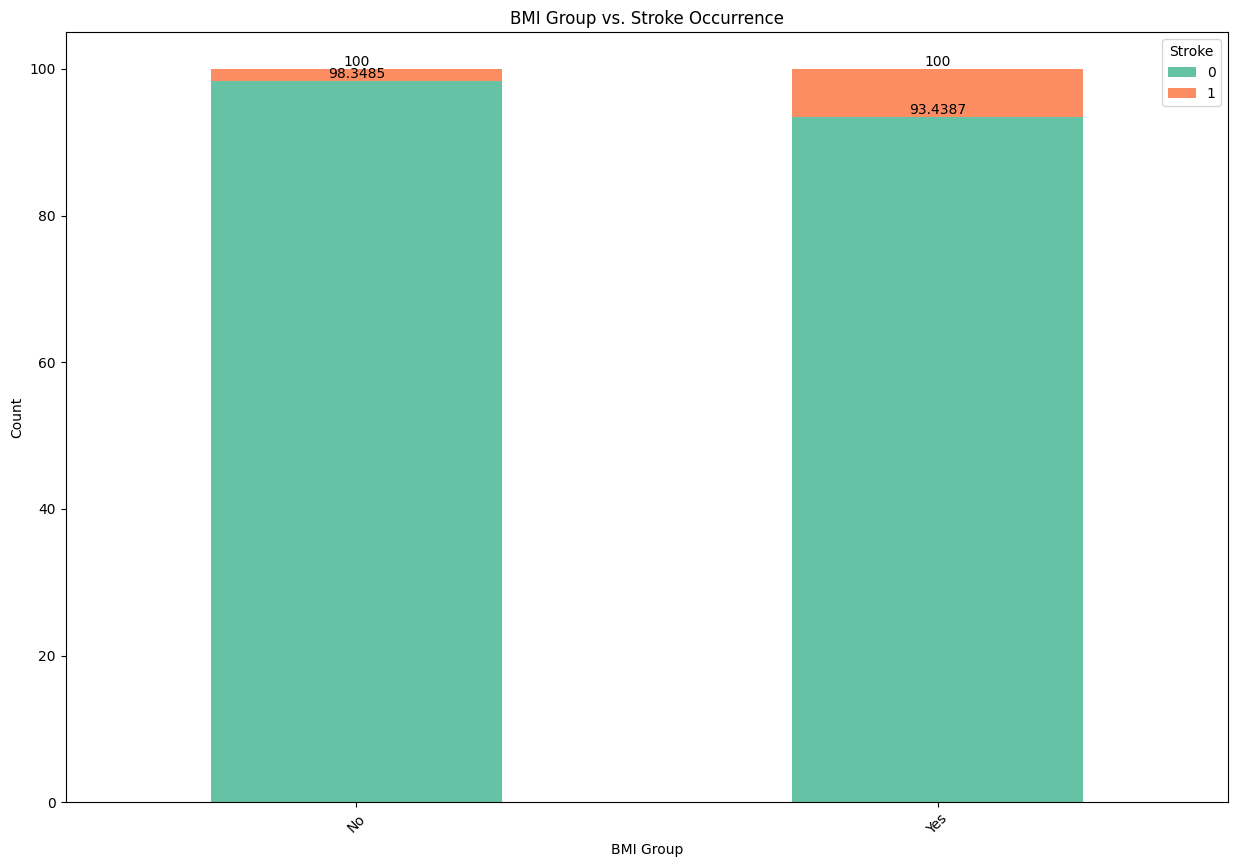

In [30]:
marry_Stroke = pd.concat([X5,y], axis=1)

fig, ax = plt.subplots(figsize=(15, 10))

marry_Stroke_counts = marry_Stroke.groupby(['ever_married', 'stroke']).size().unstack()
marry_Stroke_totals = marry_Stroke_counts.sum(axis=1)
marry_Stroke_percent = marry_Stroke_counts.div(marry_Stroke_totals, axis=0) * 100

ax = marry_Stroke_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=marry_Stroke, x='ever_married', hue='stroke', palette='Set1')


for container in ax.containers:
    ax.bar_label(container)


plt.title('BMI Group vs. Stroke Occurrence')
plt.xlabel('BMI Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stroke')

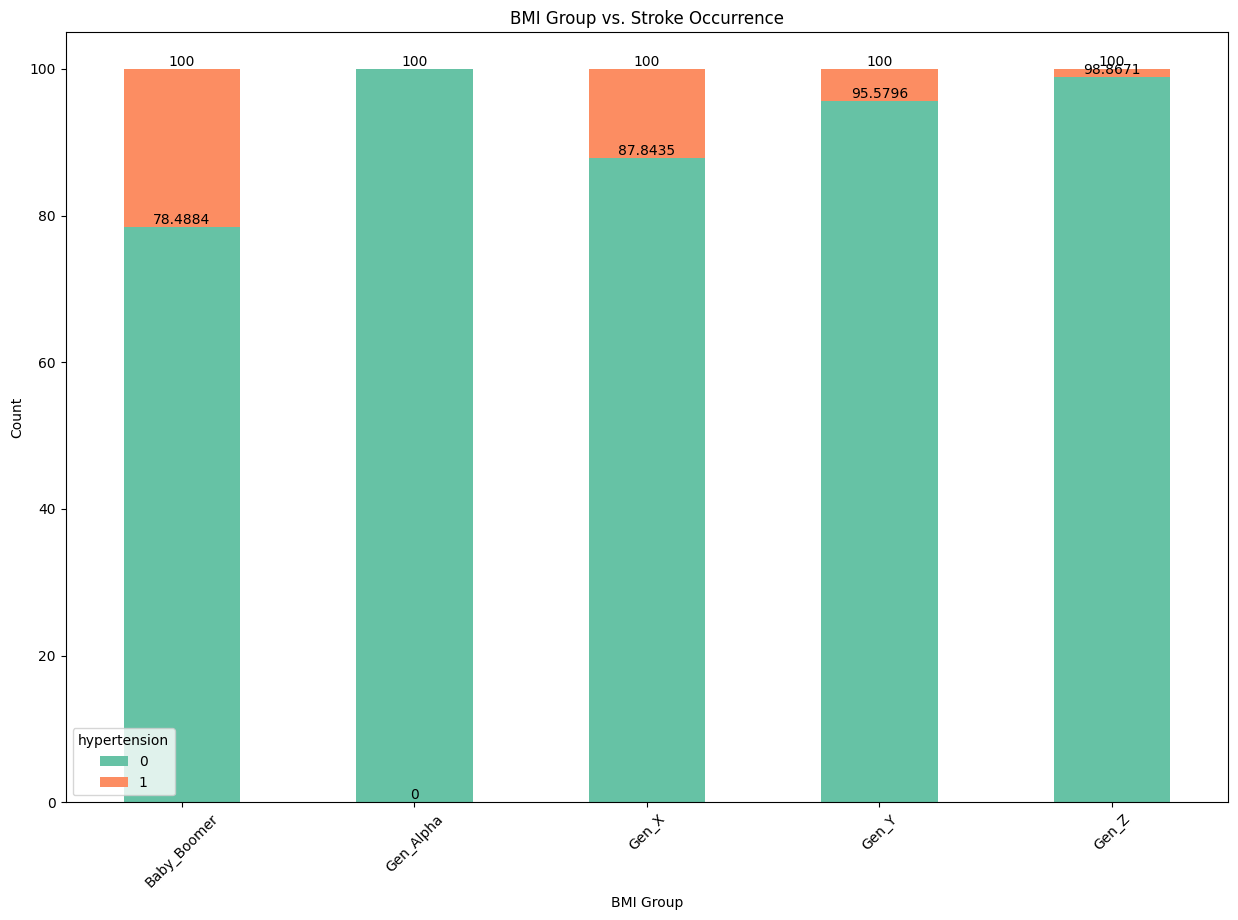

In [31]:
gen_hy = pd.concat([X11, X8], axis=1)


fig, ax = plt.subplots(figsize=(15, 10))

gen_hy_counts = gen_hy.groupby(['Generation', 'hypertension']).size().unstack()
gen_hy_totals = gen_hy_counts.sum(axis=1)
gen_hy_percent = gen_hy_counts.div(gen_hy_totals, axis=0) * 100

ax = gen_hy_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=gen_hy, x='Generation', hue='hypertension', palette='Set1')

for container in ax.containers:
    ax.bar_label(container)


plt.title('BMI Group vs. Stroke Occurrence')
plt.xlabel('BMI Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='hypertension')

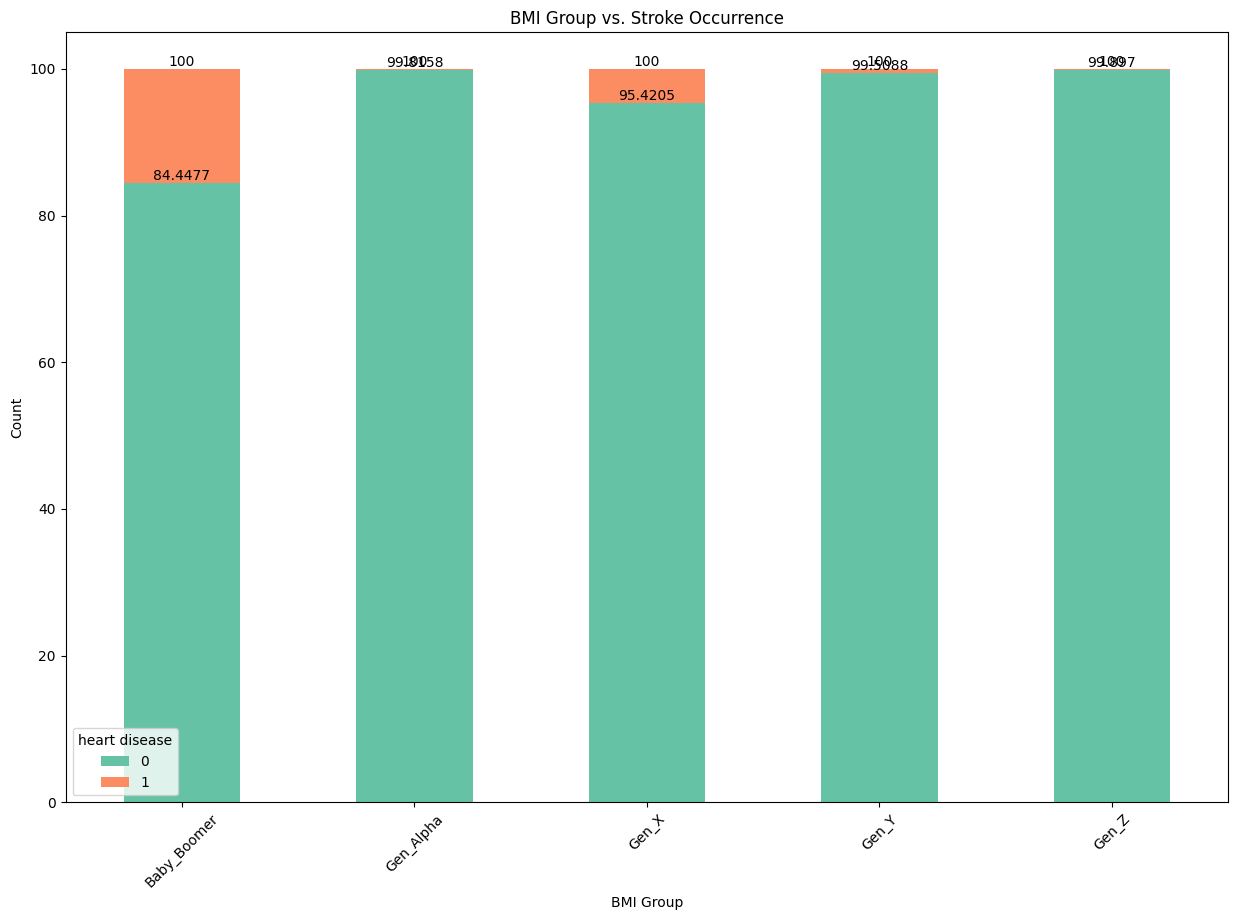

In [32]:
gen_he = pd.concat([X11, X9], axis=1)


fig, ax = plt.subplots(figsize=(15, 10))

gen_he_counts = gen_he.groupby(['Generation', 'heart_disease']).size().unstack()
gen_he_totals = gen_he_counts.sum(axis=1)
gen_he_percent = gen_he_counts.div(gen_he_totals, axis=0) * 100

ax = gen_he_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=gen_he, x='Generation', hue='heart_disease', palette='Set1')


for container in ax.containers:
    ax.bar_label(container)


plt.title('BMI Group vs. Stroke Occurrence')
plt.xlabel('BMI Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='heart disease')

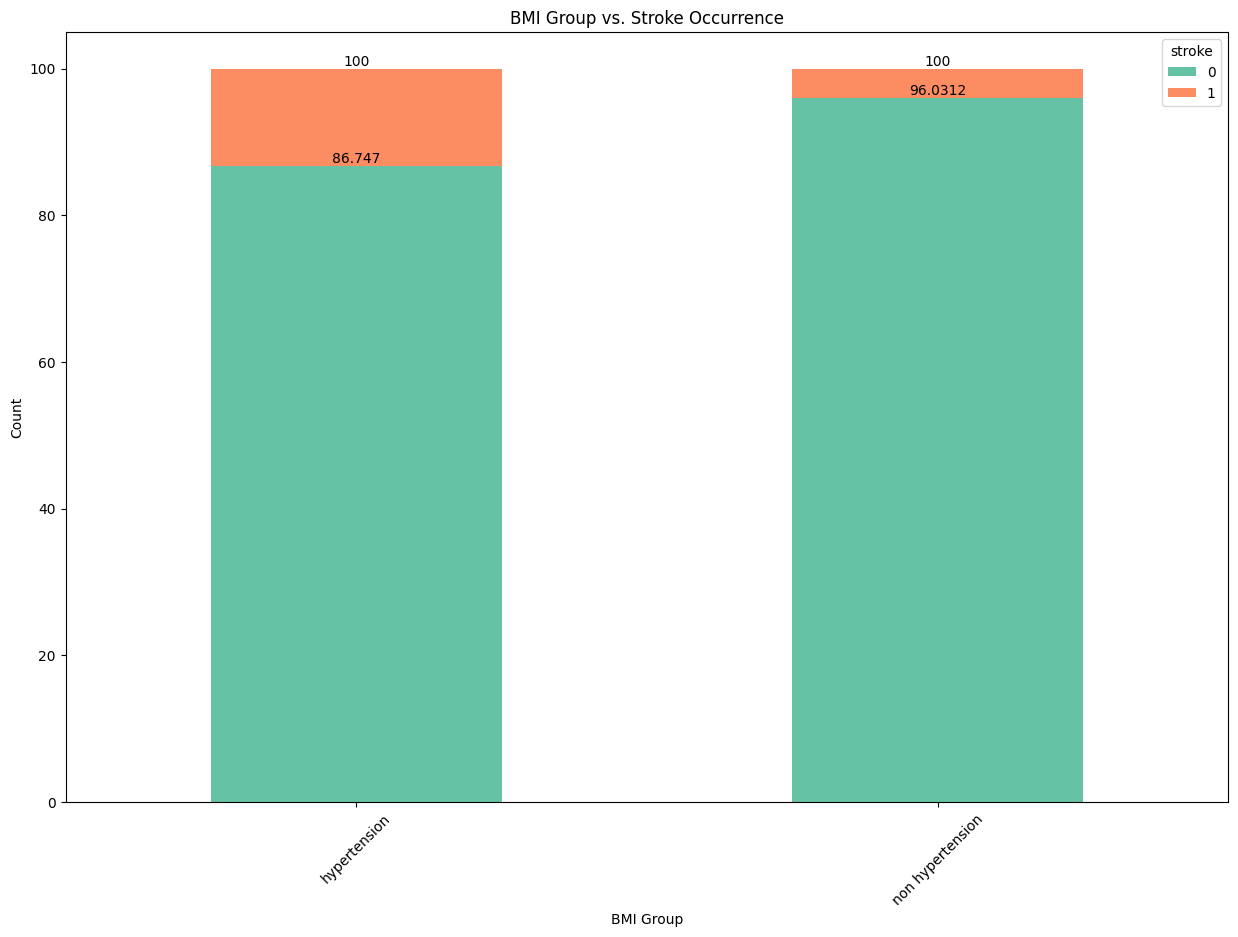

In [33]:
hy_group = Prepro_Data['hypertension'].apply(lambda x: 'hypertension' if x == 1 else 'non hypertension') 
hy_stroke = pd.concat([hy_group, y], axis=1)

fig, ax = plt.subplots(figsize=(15, 10))

hy_stroke_counts = hy_stroke.groupby(['hypertension', 'stroke']).size().unstack()
hy_stroke_totals = hy_stroke_counts.sum(axis=1)
hy_stroke_percent = hy_stroke_counts.div(hy_stroke_totals, axis=0) * 100

ax = hy_stroke_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=hy_stroke, x='hypertension', hue='stroke', palette='Set1')

for container in ax.containers:
    ax.bar_label(container)

plt.title('BMI Group vs. Stroke Occurrence')
plt.xlabel('BMI Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='stroke')

<Figure size 1500x1000 with 0 Axes>

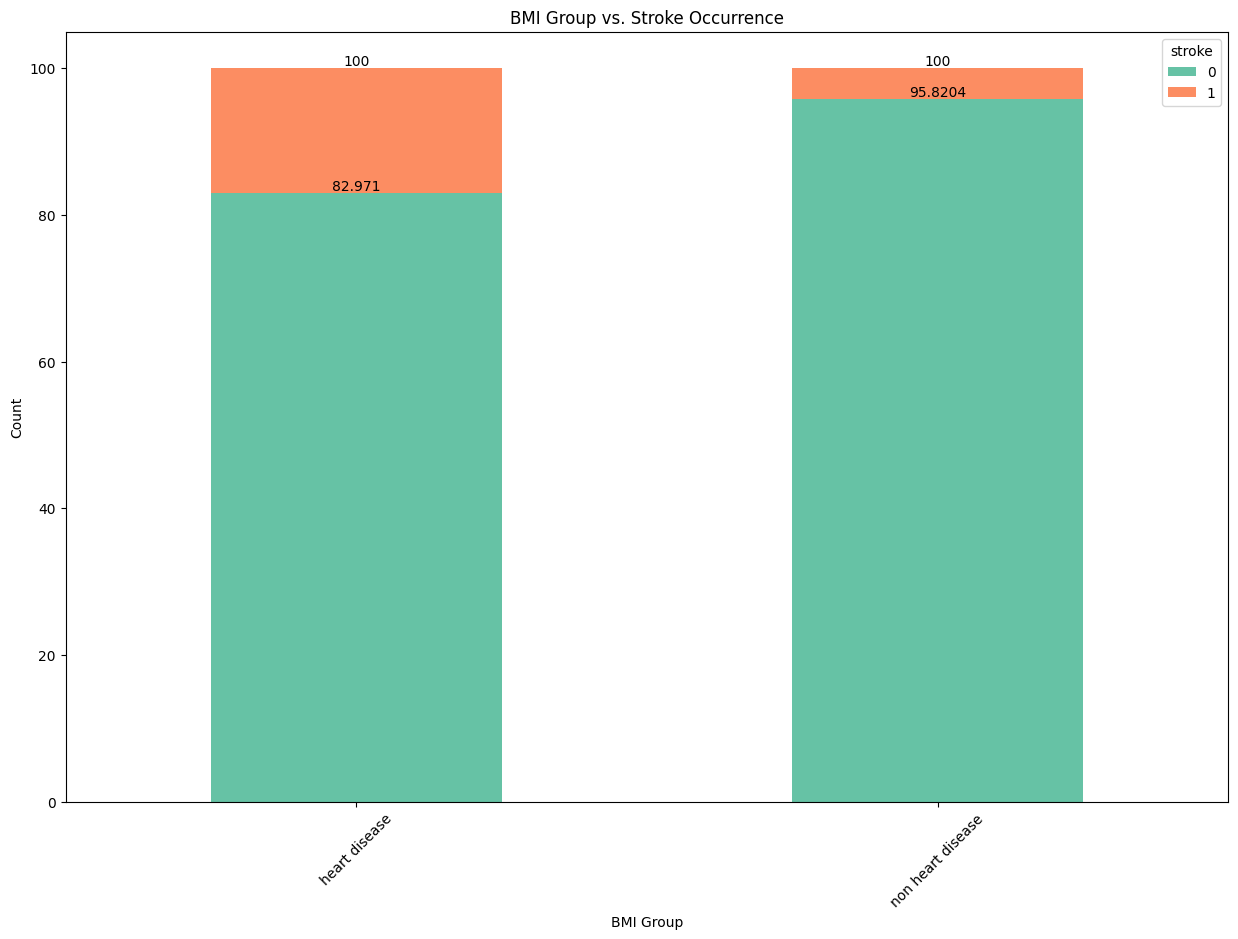

In [34]:
hd_group = Prepro_Data['heart_disease'].apply(lambda x: 'heart disease' if x == 1 else 'non heart disease') 
hd_stroke = pd.concat([hd_group, y], axis=1)

plt.figure(figsize=(15, 10))

fig, ax = plt.subplots(figsize=(15, 10))

hd_stroke_counts = hd_stroke.groupby(['heart_disease', 'stroke']).size().unstack()
hd_stroke_totals = hd_stroke_counts.sum(axis=1)
hd_stroke_percent = hd_stroke_counts.div(hd_stroke_totals, axis=0) * 100

ax = hd_stroke_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=hd_stroke, x='heart_disease', hue='stroke', palette='Set1')

for container in ax.containers:
    ax.bar_label(container)


plt.title('BMI Group vs. Stroke Occurrence')
plt.xlabel('BMI Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='stroke')

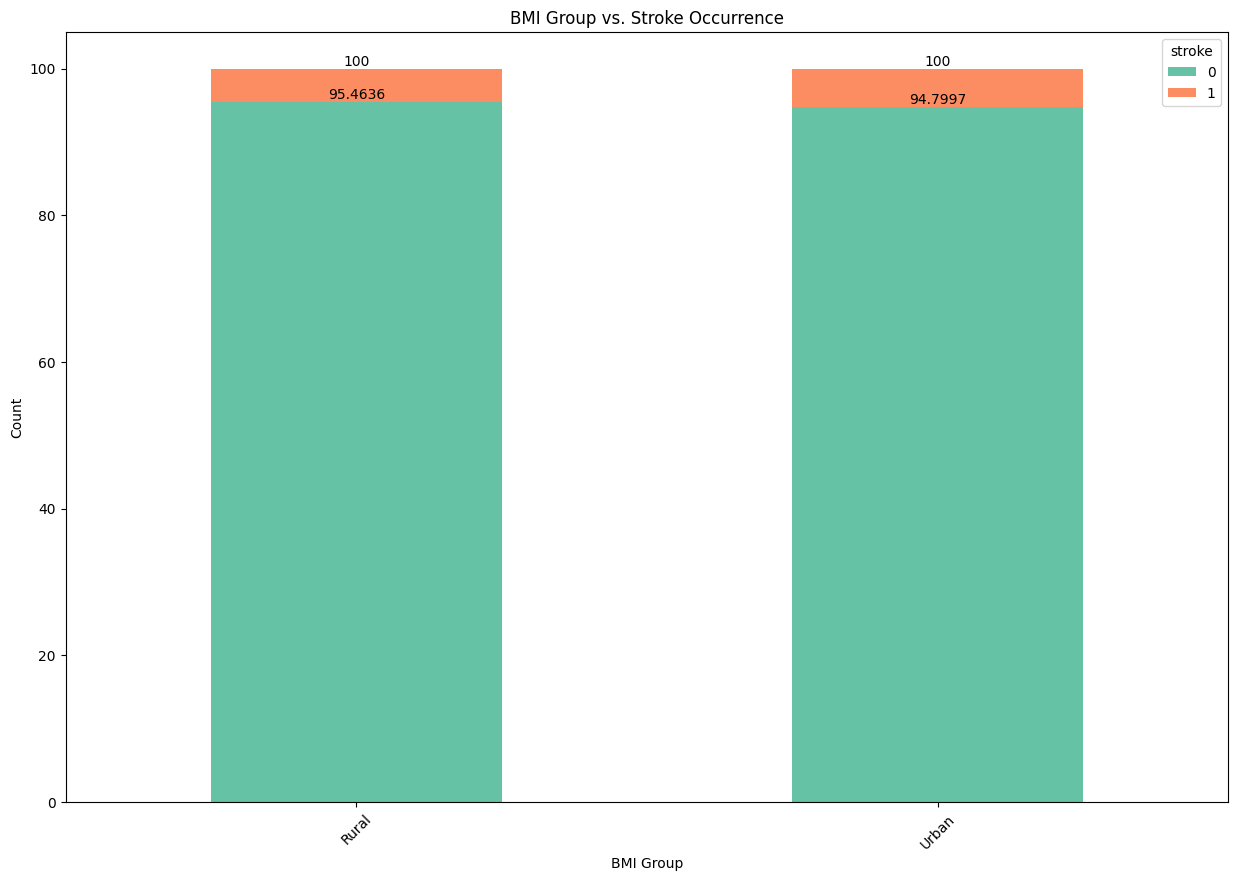

In [35]:
Reside_stroke = pd.concat([X10, y], axis=1)

fig, ax = plt.subplots(figsize=(15, 10))

Reside_stroke_counts = Reside_stroke.groupby(['Residence_type', 'stroke']).size().unstack()
Reside_stroke_totals = Reside_stroke_counts.sum(axis=1)
Reside_stroke_percent = Reside_stroke_counts.div(Reside_stroke_totals, axis=0) * 100

ax = Reside_stroke_percent.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=Reside_stroke, x='Residence_type', hue='stroke', palette='Set1')


for container in ax.containers:
    ax.bar_label(container)


plt.title('BMI Group vs. Stroke Occurrence')
plt.xlabel('BMI Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='stroke')

In [36]:
Z1 = Prepro_Data1[(Prepro_Data['bmi_group'] == 'Obesity') & (Prepro_Data['Generation'] == 'Baby_Boomer') & (Prepro_Data['ever_married'] == 'Yes' ) & 
                (Prepro_Data1['work_type'] == 'Self-employed') & (Prepro_Data['smoking_status'] == 'formerly smoked')]

Z2 = Prepro_Data1[(Prepro_Data['bmi_group'] == 'Overweight') & (Prepro_Data['Generation'] == 'Baby_Boomer') & (Prepro_Data['ever_married'] == 'Yes' ) & 
                (Prepro_Data['work_type'] == 'Self-employed') & (Prepro_Data['smoking_status'] == 'formerly smoked')]



In [37]:
X11_dummy = pd.get_dummies(X11)
X12_dummy = pd.get_dummies(X12)
X13_dummy = pd.get_dummies(X13)



In [38]:
Prepro_Data_dummy_y1 = pd.concat([Prepro_Data2, X11_dummy, X12_dummy, X13_dummy, y], axis=1)
Prepro_Data_dummy_y2 = pd.concat([Prepro_Data2, y], axis=1)

Data_of_train_1 = pd.concat([Prepro_Data2, X11_dummy, X13_dummy], axis=1)
Data_of_train_2 = Prepro_Data2
# Prepro_Data_y = Prepro_Data_dummy_y.drop(['age', 'bmi', 'avg_glucose_level'], axis=1)

In [39]:
Data_of_Heatmap1 = Prepro_Data_dummy_y1.astype(float)
Data_of_Heatmap2 = Prepro_Data_dummy_y2.astype(float)

Data_of_Heatmap1 = Data_of_train_1.astype(float)
Data_of_Heatmap2 = Data_of_train_2.astype(float)

Data_of_Heatmap1

,age,bmi,avg_glucose_level,hypertension,heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,Residence_type_Urban,Generation_Baby_Boomer,Generation_Gen_Alpha,Generation_Gen_X,Generation_Gen_Y,Generation_Gen_Z,Healthy Weight,Obesity,Overweight,Underweight
0,67.0,36.60000,228.69,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,61.0,28.89456,202.21,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,80.0,32.50000,105.92,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,49.0,34.40000,171.23,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,79.0,24.00000,174.12,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,28.89456,83.75,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5106,81.0,40.00000,125.20,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5107,35.0,30.60000,82.99,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5108,51.0,25.60000,166.29,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
Data_of_Heatmap2.to_csv('Stroke.csv', index=False)

<Axes: >

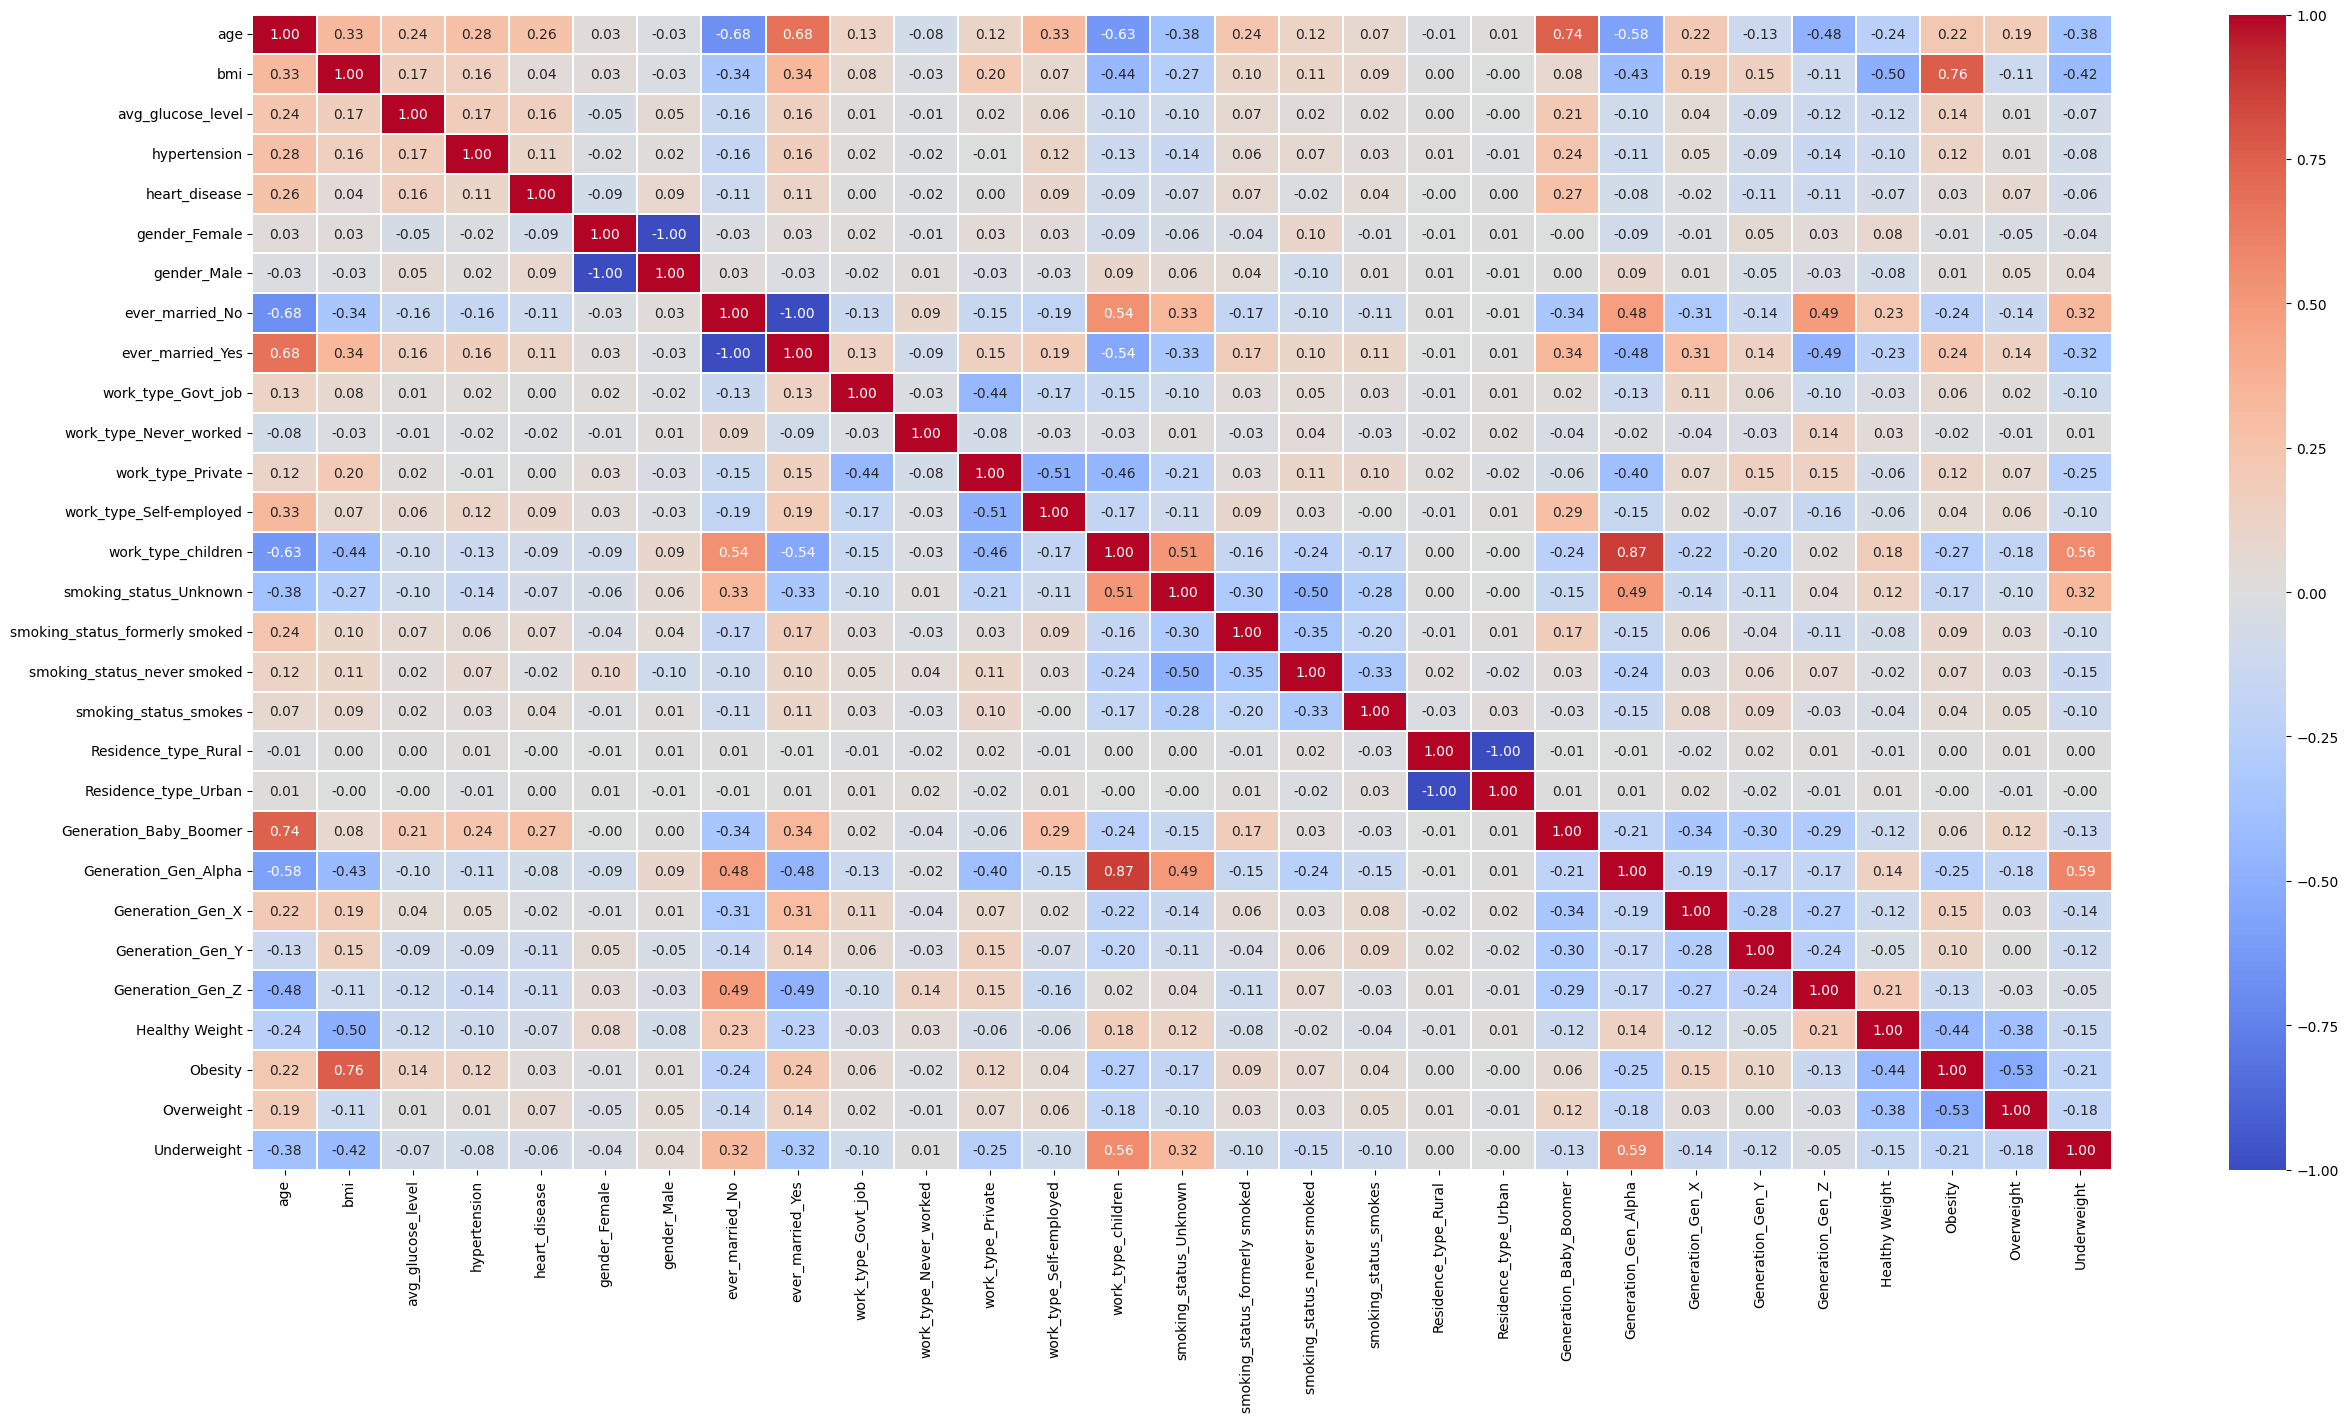

In [41]:
correlation_matrix1 = Data_of_Heatmap1.corr()

plt.figure(figsize=(30, 15)) 


sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', linewidths=0.25, fmt='.2f')

<Axes: >

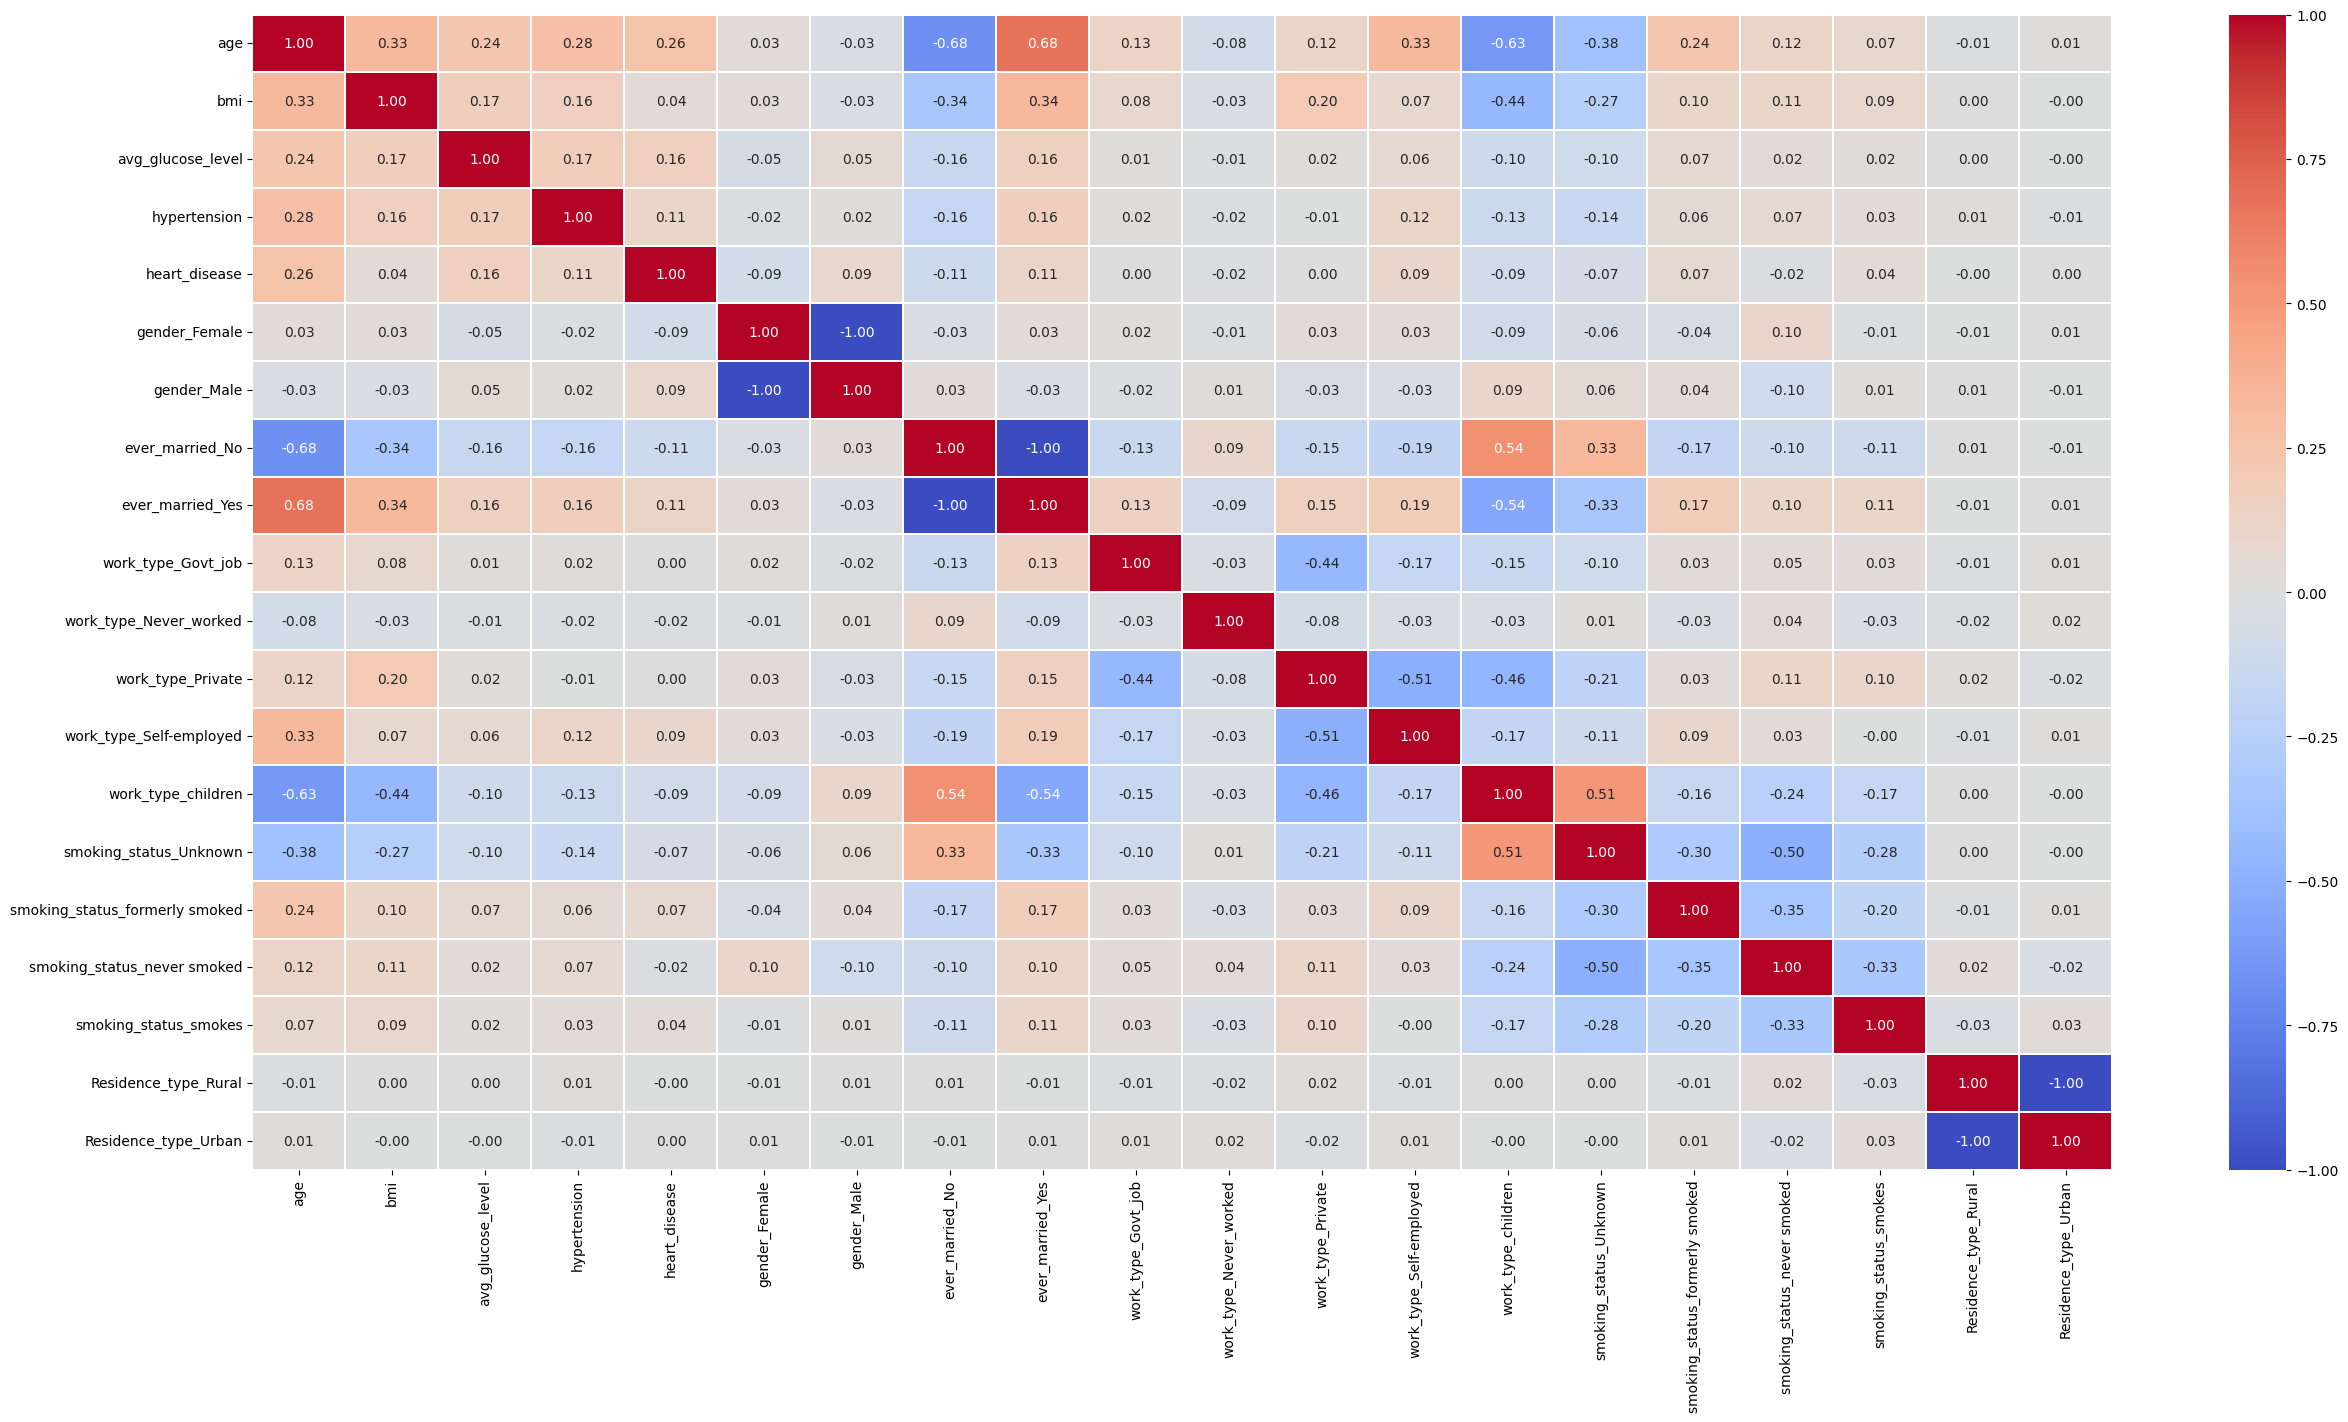

In [42]:
correlation_matrix2 = Data_of_Heatmap2.corr()

plt.figure(figsize=(30, 15)) 


sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', linewidths=0.25, fmt='.2f')

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm

In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Data_of_train_1, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(Data_of_train_2, y, test_size=0.3, random_state=42)


model1 = RandomForestClassifier()
model2 = RandomForestClassifier()


scores1 = cross_val_score(model1, Data_of_train_1, y, cv=10, scoring='accuracy')
scores2 = cross_val_score(model2, Data_of_train_2, y, cv=10, scoring='accuracy')

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)


y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)

with open('O:\\MiniProject\\MODEL\\random_forest_model1.pkl', 'wb') as file1:
    pickle.dump(model1, file1)

print("Cross-validation accuracy scores Data1 :", scores1)
print("Mean cross-validation accuracy score Data1 :", scores1.mean())
print("Test set accuracy score Data1 :", accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

print('\n')

print("Cross-validation accuracy scores Data2 :", scores2)
print("Mean cross-validation accuracy score Data2 :", scores2.mean())
print("Test set accuracy score Data2 :", accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))




Cross-validation accuracy scores Data1 : [0.94716243 0.94716243 0.95107632 0.94911937 0.94520548 0.94911937
 0.94520548 0.95303327 0.94911937 0.95098039]
Mean cross-validation accuracy score Data1 : 0.9487183914661754
Test set accuracy score Data1 : 0.9399869536855838
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



Cross-validation accuracy scores Data2 : [0.94911937 0.94911937 0.94911937 0.95107632 0.94129159 0.95303327
 0.94911937 0.95107632 0.95107632 0.95098039]
Mean cross-validation accuracy score Data2 : 0.949501170331146
Test set accuracy score Data2 : 0.9419439008480104
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00  

c:\Users\IloveCdti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\IloveCdti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\IloveCdti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [45]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Data_of_train_1, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(Data_of_train_2, y, test_size=0.3, random_state=42)


model1 = KNeighborsClassifier(n_neighbors=3)
model2 = KNeighborsClassifier(n_neighbors=3)


scores1 = cross_val_score(model1, Data_of_train_1, y, cv=10, scoring='accuracy')
scores2 = cross_val_score(model2, Data_of_train_2, y, cv=10, scoring='accuracy')

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)


y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)


print("Cross-validation accuracy scores Data1 :", scores1)
print("Mean cross-validation accuracy score Data1 :", scores1.mean())
print("Test set accuracy score Data1 :", accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

print('\n')


print("Cross-validation accuracy scores Data2 :", scores2)
print("Mean cross-validation accuracy score Data2 :", scores2.mean())
print("Test set accuracy score Data2 :", accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))


Cross-validation accuracy scores Data1 : [0.93933464 0.9295499  0.93737769 0.93737769 0.93150685 0.93542074
 0.93542074 0.95107632 0.94716243 0.94117647]
Mean cross-validation accuracy score Data1 : 0.9385403476459077
Test set accuracy score Data1 : 0.9328114807566862
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.21      0.06      0.09        89

    accuracy                           0.93      1533
   macro avg       0.58      0.52      0.53      1533
weighted avg       0.90      0.93      0.91      1533



Cross-validation accuracy scores Data2 : [0.93737769 0.92759295 0.94324853 0.93737769 0.9334638  0.93542074
 0.93737769 0.95107632 0.94520548 0.93921569]
Mean cross-validation accuracy score Data2 : 0.9387356586470205
Test set accuracy score Data2 : 0.9341161121983039
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.23 

In [46]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Data_of_train_1, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(Data_of_train_2, y, test_size=0.3, random_state=42)


model1 = svm.SVC()
model2 = svm.SVC()


scores1 = cross_val_score(model1, Data_of_train_1, y, cv=10, scoring='accuracy')
scores2 = cross_val_score(model2, Data_of_train_2, y, cv=10, scoring='accuracy')

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)


y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)


print("Cross-validation accuracy scores Data1 :", scores1)
print("Mean cross-validation accuracy score Data1 :", scores1.mean())
print("Test set accuracy score Data1 :", accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

print('\n')


print("Cross-validation accuracy scores Data2 :", scores2)
print("Mean cross-validation accuracy score Data2 :", scores2.mean())
print("Test set accuracy score Data2 :", accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

Cross-validation accuracy scores Data1 : [0.95107632 0.95107632 0.95107632 0.95107632 0.95107632 0.95107632
 0.95107632 0.95107632 0.95107632 0.95294118]
Mean cross-validation accuracy score Data1 : 0.95126280649246
Test set accuracy score Data1 : 0.9419439008480104
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



Cross-validation accuracy scores Data2 : [0.95107632 0.95107632 0.95107632 0.95107632 0.95107632 0.95107632
 0.95107632 0.95107632 0.95107632 0.95294118]
Mean cross-validation accuracy score Data2 : 0.95126280649246
Test set accuracy score Data2 : 0.9419439008480104
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00     

c:\Users\IloveCdti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\IloveCdti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\IloveCdti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [47]:
X_train1

# np.copy(X_train1[12:13])

,age,bmi,avg_glucose_level,hypertension,heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,Residence_type_Urban,Generation_Baby_Boomer,Generation_Gen_Alpha,Generation_Gen_X,Generation_Gen_Y,Generation_Gen_Z,Healthy Weight,Obesity,Overweight,Underweight
4039,15.00,17.4,74.83,0,0,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,True
576,29.00,22.8,207.58,0,0,False,True,True,False,False,...,True,False,False,False,False,True,True,False,False,False
4013,44.00,26.5,91.28,1,0,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
4536,68.00,40.3,150.74,1,0,True,False,False,True,False,...,True,True,False,False,False,False,False,True,False,False
1180,62.00,36.0,82.57,0,0,True,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,61.00,29.8,144.14,0,0,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
466,61.00,60.2,170.05,1,0,True,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
3092,1.16,17.8,97.28,0,0,True,False,True,False,False,...,True,False,True,False,False,False,False,False,False,True
3773,38.00,21.5,93.93,0,0,True,False,False,True,True,...,False,False,False,False,True,False,True,False,False,False


In [48]:
y_train1.head(50)

4039    0
576     0
4013    0
4536    0
1180    0
888     0
3292    0
2727    0
2865    0
817     0
3443    0
2016    0
208     1
293     0
1119    0
2321    0
1743    0
1264    0
990     0
4600    0
4292    0
4397    0
353     0
3275    0
1609    0
3200    0
1489    0
2680    0
4245    0
4237    0
1228    0
259     0
4195    0
4621    0
4846    0
4761    0
4252    0
52      1
2302    0
3670    0
2298    0
2525    0
4343    0
2458    0
1479    0
1507    0
1033    0
1097    0
1469    0
543     0
Name: stroke, dtype: int64